# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28, 1)


TypeError: ignored

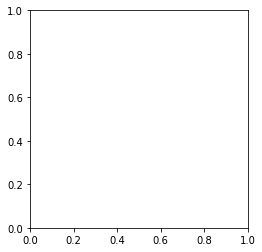

In [117]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Convolution2D, MaxPooling2D,GlobalAveragePooling2D

In [84]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
# num_pixels = X_train.shape[1]*X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')


# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

In [0]:
from keras import regularizers

In [0]:
from  keras.regularizers import *

In [137]:
from keras.layers import Activation
model = Sequential()

#block 1 
model.add(Convolution2D(10, 3, 3,  input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(20, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


# model.add(Convolution2D(20, 3, 3, activation='relu')) 
# model.add(BatchNormalization())
# model.add(Dropout(0.1))




model.add(Convolution2D(10, 1, 1)) 

model.add(MaxPooling2D(pool_size=(2,2))) #12


 
#block 2
model.add(Convolution2D(20, 3, 3)) #10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3)) #8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))




model.add(Convolution2D(10,1)) #8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10,8)) #8



#model.add(Flatten())
model.add(GlobalAveragePooling2D())

#activity_regularizer=activity_l2(0.01)
model.add(Activation('softmax'))

model.add(layers.ActivityRegularization(l1=0.01, l2=0.01))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`


In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_48 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_48 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_49 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
activation_49 (Activation)   (None, 24, 24, 20)        0         
__________

In [0]:
# from keras.optimizers import SGD
# opt = SGD(lr=0.04, momentum=0.9)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement_run_1_10-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Fourth Network

Inference of Network 3 is rectified by using a Learning rate scheduler which would adjust the learning rate for every epoch .But a proper clr also could also resolve this problem . Then a Adam optimizer is selected with 0.003 learing rate .

Checkpoints are added to save  the weights of highest 

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])



In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)

In [0]:
valid_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
valid_datagen.fit(X_test)

In [144]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=5,validation_data=valid_datagen.flow(X_test,Y_test,batch_size=64),validation_steps = X_test.shape[0]/64)

Epoch 1/5
938/937 [==============================] - 15s 16ms/step - loss: 1.3564 - acc: 0.9571 - val_loss: 1.3002 - val_acc: 0.9821
Epoch 2/5
938/937 [==============================] - 12s 13ms/step - loss: 1.3048 - acc: 0.9825 - val_loss: 1.2962 - val_acc: 0.9854
Epoch 3/5
938/937 [==============================] - 11s 12ms/step - loss: 1.2978 - acc: 0.9861 - val_loss: 1.2892 - val_acc: 0.9906
Epoch 4/5
938/937 [==============================] - 11s 12ms/step - loss: 1.2948 - acc: 0.9873 - val_loss: 1.2885 - val_acc: 0.9906
Epoch 5/5
938/937 [==============================] - 11s 12ms/step - loss: 1.2917 - acc: 0.9897 - val_loss: 1.2885 - val_acc: 0.9911


In [145]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=35,validation_data=valid_datagen.flow(X_test,Y_test,batch_size=64),validation_steps = X_test.shape[0]/64)

Epoch 1/35
938/937 [==============================] - 13s 14ms/step - loss: 1.2912 - acc: 0.9893 - val_loss: 1.2881 - val_acc: 0.9915
Epoch 2/35
938/937 [==============================] - 11s 12ms/step - loss: 1.2894 - acc: 0.9906 - val_loss: 1.2868 - val_acc: 0.9912
Epoch 3/35
938/937 [==============================] - 12s 12ms/step - loss: 1.2878 - acc: 0.9913 - val_loss: 1.2869 - val_acc: 0.9916
Epoch 4/35
938/937 [==============================] - 13s 14ms/step - loss: 1.2872 - acc: 0.9918 - val_loss: 1.2861 - val_acc: 0.9920
Epoch 5/35
938/937 [==============================] - 11s 12ms/step - loss: 1.2864 - acc: 0.9921 - val_loss: 1.2867 - val_acc: 0.9907
Epoch 6/35
938/937 [==============================] - 11s 12ms/step - loss: 1.2857 - acc: 0.9927 - val_loss: 1.2867 - val_acc: 0.9908
Epoch 7/35
938/937 [==============================] - 12s 13ms/step - loss: 1.2847 - acc: 0.9933 - val_loss: 1.2850 - val_acc: 0.9915
Epoch 8/35
938/937 [==============================] - 12s 12ms

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [98]:
# validation is done with normalized images
print(score)

[2.377101025390625, 0.1774]


In [0]:
# though i used image normalization for validation dataset not able to get proper output 
y_pred = model.predict_generator(valid_datagen.flow(X_test,batch_size=64),X_test.shape[0]/64)

In [0]:
import numpy as np
y_pred_integers = np.argmax(y_pred, axis=1) 

In [149]:
print(y_pred_integers[:10])
print(Y_test[:10])

[3 7 5 1 9 2 8 9 8 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [121]:
X_test[0].shape

(28, 28, 1)

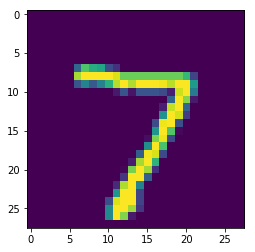

In [150]:
plt.imshow(X_test[0].reshape(28,28))

In [151]:
print(y_pred_integers[:10])
print(y_test[:10])

[3 7 5 1 9 2 8 9 8 1]
[7 2 1 0 4 1 4 9 5 9]


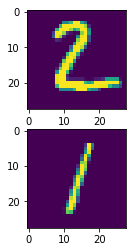

In [152]:

plt.figure(1)
plt.subplot(211)
plt.imshow(X_test[1].reshape(28,28))

plt.subplot(212)
plt.imshow(X_test[2].reshape(28,28))


  

plt.show()

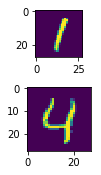

In [153]:
plt.subplot(311)
plt.imshow(X_test[3].reshape(28,28))

plt.subplot(312)
plt.imshow(X_test[4].reshape(28,28))
plt.subplot(411)
plt.imshow(X_test[5].reshape(28,28))
  

plt.show()


In [154]:
print(y_pred[:9])
print(y_test[:9])

[[6.60077148e-08 2.57458709e-07 5.71126118e-04 9.83669460e-01
  2.10866631e-07 1.56616364e-02 2.26937360e-07 7.96941604e-05
  4.44091529e-06 1.28655547e-05]
 [2.77170999e-04 5.79649641e-04 1.42424526e-02 6.23317063e-02
  3.11802229e-04 5.88422455e-03 1.79716553e-05 8.82279932e-01
  1.87238422e-03 3.22027579e-02]
 [4.71955258e-03 3.43016654e-05 3.43366191e-05 2.16800021e-03
  1.09032189e-04 9.75056052e-01 1.24290225e-03 5.45891467e-04
  1.14968978e-02 4.59306967e-03]
 [7.04899617e-03 9.12584305e-01 1.37599455e-02 3.58657388e-04
  1.78328399e-02 6.70254836e-03 5.18350862e-03 2.71623041e-02
  8.88174586e-03 4.85296739e-04]
 [1.23560913e-02 2.24938103e-05 1.03491812e-03 1.66081195e-03
  1.76118650e-02 3.20055080e-03 3.31854593e-04 3.36278826e-02
  1.26751550e-02 9.17478442e-01]
 [5.78886902e-05 2.25119638e-05 9.93295372e-01 2.94600916e-03
  1.47602918e-06 3.01382988e-05 2.84389043e-05 7.17302319e-04
  2.90037831e-03 4.38950678e-07]
 [1.36029837e-03 1.69656786e-07 3.46235819e-02 4.66463063e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

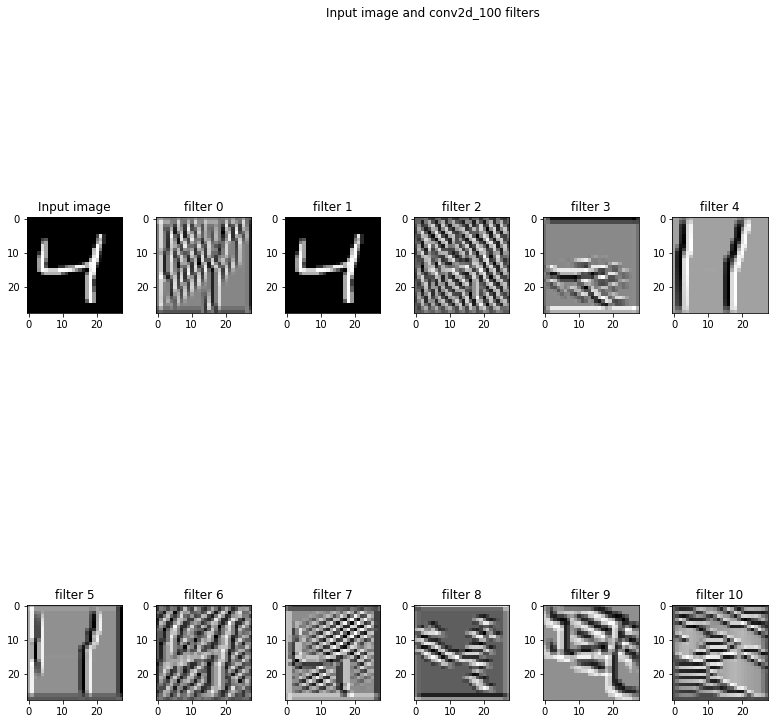

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_100'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()